# What Kind of Game Should I Make?

## Introduction

# Data Curation

Importing Libraries:

In [230]:
import pandas as pd
import numpy as np
import scipy.stats as scst
import matplotlib.pyplot as plt
from math import ceil

Reading the dataset into a dataframe. Dataset can be found at the following link: https://www.kaggle.com/datasets/fronkongames/steam-games-dataset

In [231]:
df = pd.read_csv("games.csv")
df.head()

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",...,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


Outputting some basic information about shape of the dataframe:

In [232]:
print(f"Column names: {list(df.columns)}.")
print(f"Dimensions: {df.shape[0]} rows and {df.shape[1]} columns.")
print("Data types:===============================================" + 
      f"\n{df.dtypes}\n" + 
      "==========================================================")

Column names: ['AppID', 'Name', 'Release date', 'Estimated owners', 'Peak CCU', 'Required age', 'Price', 'DLC count', 'About the game', 'Supported languages', 'Full audio languages', 'Reviews', 'Header image', 'Website', 'Support url', 'Support email', 'Windows', 'Mac', 'Linux', 'Metacritic score', 'Metacritic url', 'User score', 'Positive', 'Negative', 'Score rank', 'Achievements', 'Recommendations', 'Notes', 'Average playtime forever', 'Average playtime two weeks', 'Median playtime forever', 'Median playtime two weeks', 'Developers', 'Publishers', 'Categories', 'Genres', 'Tags', 'Screenshots', 'Movies'].
Dimensions: 85103 rows and 39 columns.
Data types:===============================================
AppID                           int64
Name                           object
Release date                   object
Estimated owners               object
Peak CCU                        int64
Required age                    int64
Price                         float64
DLC count             

## Cleaning and modifying the data set

Converting release date column to datetimes:

In [233]:
def sanitize_dates(date:str):
    split_date = date.split(",")
    # If there's no comma in the date, assume no release day is specified; default to 1st of the month
    if len(split_date) == 1:
        split_date = date.split(" ")
        return f"{split_date[0]} 1, {split_date[1]}"
    else:
        return date

df["Release date"] = df["Release date"].apply(sanitize_dates)
df["Release date"] = pd.to_datetime(df["Release date"], format="%b %d, %Y")

In [234]:
df.head()

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,2008-10-21,0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,2017-10-12,0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,2021-11-17,0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosis™,2020-07-23,0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1139950,Two Weeks in Painland,2020-02-03,0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",...,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


### Removing Columns
The following columns will be removed; they are used for storefront purposes and will not help our data analysis:
"About the game", "Support url", "Support email", "Metacritic url", "Notes", "Screenshots", "Movies"

In [235]:
df = df.drop(["About the game", "Support url", "Support email", "Metacritic url", "Notes", "Screenshots", "Movies"], axis=1)

In [236]:
df.head()

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,Supported languages,Full audio languages,...,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags
0,20200,Galactic Bowling,2008-10-21,0 - 20000,0,0,19.99,0,['English'],[],...,0,0,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling"
1,655370,Train Bandit,2017-10-12,0 - 20000,0,0,0.99,0,"['English', 'French', 'Italian', 'German', 'Sp...",[],...,0,0,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc..."
2,1732930,Jolt Project,2021-11-17,0 - 20000,0,0,4.99,0,"['English', 'Portuguese - Brazil']",[],...,0,0,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN
3,1355720,Henosis™,2020-07-23,0 - 20000,0,0,5.99,0,"['English', 'French', 'Italian', 'German', 'Sp...",[],...,0,0,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz..."
4,1139950,Two Weeks in Painland,2020-02-03,0 - 20000,0,0,0.00,0,"['English', 'Spanish - Spain']",[],...,0,0,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,..."


In [14]:
df1 = df[df["Metacritic score"] != 0]
df1.shape

(3912, 39)

### Adding and Modifying Features
Let's add columns for the total number of ratings and the percentage of ratings that are positive.

In [237]:
df["Total Ratings"] = df["Positive"] + df["Negative"]
df["Percent Positive Ratings"] = (df["Positive"] / df["Total Ratings"]) * 100.0
df

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,Supported languages,Full audio languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Total Ratings,Percent Positive Ratings
0,20200,Galactic Bowling,2008-10-21,0 - 20000,0,0,19.99,0,['English'],[],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",17,35.294118
1,655370,Train Bandit,2017-10-12,0 - 20000,0,0,0.99,0,"['English', 'French', 'Italian', 'German', 'Sp...",[],...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",58,91.379310
2,1732930,Jolt Project,2021-11-17,0 - 20000,0,0,4.99,0,"['English', 'Portuguese - Brazil']",[],...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,0,NaN
3,1355720,Henosis™,2020-07-23,0 - 20000,0,0,5.99,0,"['English', 'French', 'Italian', 'German', 'Sp...",[],...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",3,100.000000
4,1139950,Two Weeks in Painland,2020-02-03,0 - 20000,0,0,0.00,0,"['English', 'Spanish - Spain']",[],...,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",58,86.206897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85098,2669080,Mannerheim's Saloon Car,2024-01-02,0 - 0,0,0,0.00,0,"['English', 'Finnish']",['Finnish'],...,0,0,0,Xamk Game Studios,"Sodan ja rauhan keskus Muisti, Päämajamuseo","Single-player,Tracked Controller Support,VR Only","Adventure,Simulation",NaN,0,NaN
85099,2736910,Beer Run,2024-01-03,0 - 0,0,0,0.00,0,['English'],[],...,0,0,0,955 Games,955 Games,Single-player,"Casual,Indie",NaN,0,NaN
85100,2743220,My Friend The Spider,2024-01-04,0 - 0,0,0,0.00,0,['English'],['English'],...,0,0,0,MCA,MCA,Single-player,"Adventure,Simulation",NaN,0,NaN
85101,2293130,Path of Survivors,2024-01-08,0 - 0,0,0,3.99,0,['English'],[],...,0,0,0,Limited Input,Limited Input,"Single-player,Steam Achievements,Partial Contr...","Action,Casual,Indie,RPG,Simulation",NaN,0,NaN


The Categories, Genres, and Tags columns have values that are long, comma-separated lists of string values. Currently, they're read as a single long string. For ease of access, let's separate the Categories, Genres, and Tags columns' values into lists.

In [238]:
def simple_split(string, delim:str):
    if pd.isna(string):
        return pd.NA
    else:
        return string.split(delim)

df["Categories"] = df["Categories"].apply(simple_split, args=(","))
df["Genres"] = df["Genres"].apply(simple_split, args=(","))
df["Tags"] = df["Tags"].apply(simple_split, args=(","))

<Axes: >

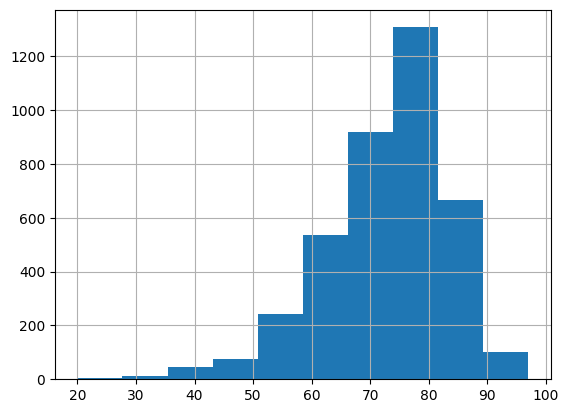

In [239]:
df = df[df["Metacritic score"] > 0]
df["Metacritic score"].hist()

## What should the game be about?

In [240]:
df_tags = df.explode("Tags")
print(df_tags.shape)
df_tags.dropna(subset = ["Tags"], inplace=True)
print(df_tags.shape)

(60546, 34)
(60520, 34)


In [241]:
all_tags = list(pd.unique(df_tags["Tags"]))
tag_groups = [list(df_tags["Metacritic score"][df_tags["Tags"] == tag]) for tag in all_tags]
scst.f_oneway(*tag_groups).pvalue

1.1510041421264897e-121

In [242]:
top_tags = df_tags[["Tags", "Metacritic score"]].groupby(["Tags"]).mean()
top20 = (top_tags.sort_values(by=["Metacritic score"], ascending=False)).head(20)
top20

,Metacritic score
Tags,
Batman,91.000000
Rock Music,87.000000
Well-Written,85.750000
Baseball,85.250000
Electronic Music,82.750000
Masterpiece,82.526316
Addictive,81.072727
Silent Protagonist,80.666667
Archery,80.250000


## How many copies can I expect to sell?

In [243]:
pd.unique(df["Estimated owners"])

array(['20000 - 50000', '200000 - 500000', '100000 - 200000',
       '50000 - 100000', '500000 - 1000000', '2000000 - 5000000',
       '1000000 - 2000000', '0 - 20000', '20000000 - 50000000',
       '5000000 - 10000000', '0 - 0', '10000000 - 20000000',
       '50000000 - 100000000', '100000000 - 200000000'], dtype=object)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, '0 - 0'),
  Text(1, 0, '0 - 20000'),
  Text(2, 0, '20000 - 50000'),
  Text(3, 0, '50000 - 100000'),
  Text(4, 0, '100000 - 200000'),
  Text(5, 0, '200000 - 500000'),
  Text(6, 0, '500000 - 1000000'),
  Text(7, 0, '1000000 - 2000000'),
  Text(8, 0, '2000000 - 5000000'),
  Text(9, 0, '5000000 - 10000000'),
  Text(10, 0, '10000000 - 20000000'),
  Text(11, 0, '20000000 - 50000000'),
  Text(12, 0, '50000000 - 100000000')])

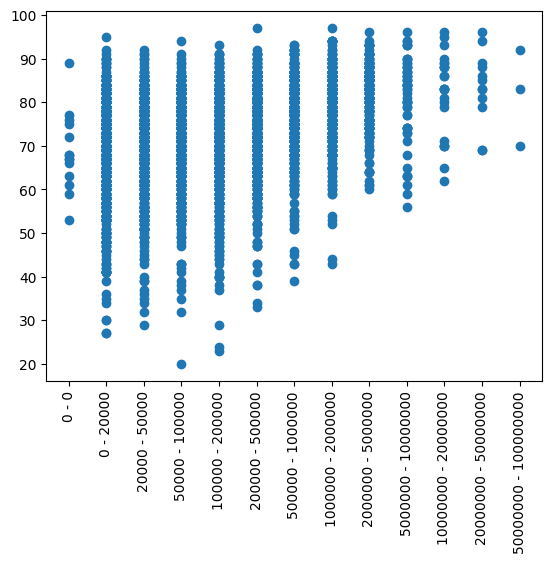

In [244]:
est_owners = ['0 - 0', '0 - 20000', '20000 - 50000', '50000 - 100000', '100000 - 200000','200000 - 500000', '500000 - 1000000', '1000000 - 2000000', '2000000 - 5000000', '5000000 - 10000000', '10000000 - 20000000', '20000000 - 50000000', '50000000 - 100000000']

own_to_score = dict.fromkeys(est_owners)
for key in own_to_score.keys():
    own_to_score[key] = df["Metacritic score"][df["Estimated owners"] == key]

owners = []
o_scores = []

for key in own_to_score.keys():
    owners += [key for _ in range(len(own_to_score[key]))]
    o_scores += list(own_to_score[key])

plt.scatter(owners, o_scores)
# plt.bar(own_to_score.keys(), own_to_score.values())
plt.xticks(rotation=90)
# df[df["Estimated owners"] == '50000000 - 100000000']
# df["Metacritic score"][df["Estimated owners"] == '0 - 0']

## What should the price of the game be?

In [245]:
pr_ms_df = df[["Price", "Metacritic score"]]
pr_ms_df

,Price,Metacritic score
10,23.99,62
15,9.99,64
42,19.99,53
44,3.99,84
66,3.49,89
...,...,...
83304,19.99,90
83349,14.99,85
83424,14.99,82
84088,35.99,80


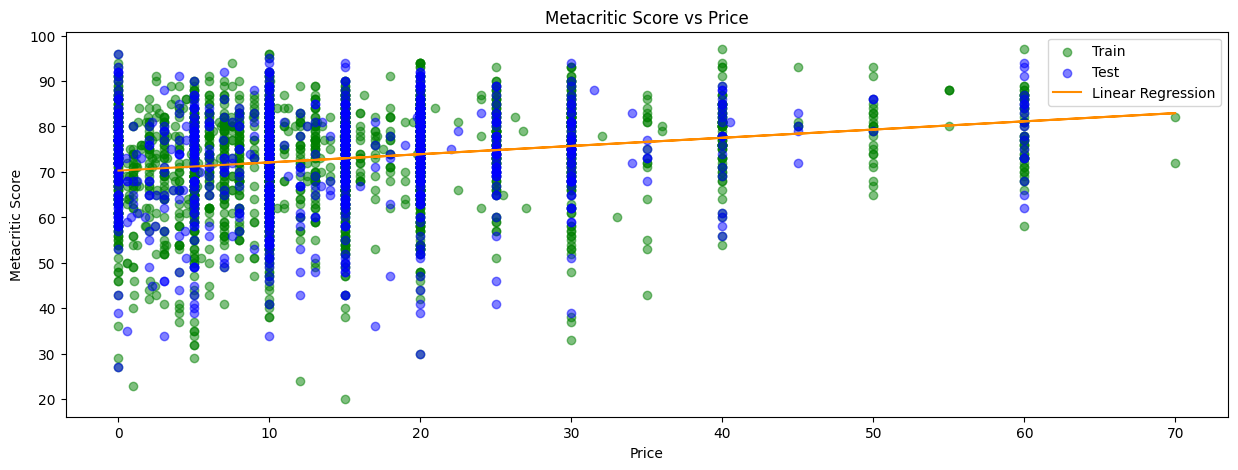

In [246]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

X_raw = pr_ms_df[["Price"]]
Y_raw = pr_ms_df[["Metacritic score"]]

X_train, X_test, Y_train, Y_test = train_test_split(X_raw, Y_raw)

poly = PolynomialFeatures(degree=1)

model = make_pipeline(poly, LinearRegression())
model.fit(X_train, Y_train)
Y_pred = model.predict(X_train)

fig, axes = plt.subplots(1, 1, figsize=(15, 5))
axes.scatter(X_train, Y_train, color='green', label='Train', alpha=0.5)
axes.scatter(X_test, Y_test, color='blue', label='Test', alpha=0.5)
axes.plot(X_train, Y_pred, color='darkorange', label='Linear Regression')
axes.set_title('Metacritic Score vs Price')
axes.set_xlabel('Price')
axes.set_ylabel('Metacritic Score')
axes.legend()

In [247]:
scst.pearsonr(df["Price"], df["Metacritic score"])

PearsonRResult(statistic=0.19946466670182456, pvalue=2.1512414382486546e-36)

# Insights and Conclusions